In [64]:
# Initialize Otter
import otter
grader = otter.Notebook("final-exam.ipynb")

In [65]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def check_number(to_test):
    is_float = False
    try:
        tmp = np.int64(to_test)
        is_float = type(tmp) in set([int, np.int32, np.int64])
    except:
        pass
    return is_float

correlations = {}
def get_correlations(tbl, corr_func):
#    correlations = {} 
    for label in tbl.labels:
        # check if the first element of the column is a number
        if check_number(tbl.column(label)[0]):
            correlations[label] = corr_func(tbl.column("Car Purchase Amount"), tbl.column(label))
        else:
            correlations[label] = None
    return Table().with_columns(
        "Column Label", correlations.keys(),
        "Correlation", correlations.values())

# Final Exam

Welcome to the Final Exam for DS100! Please read the following closely:

* The exam is "open web" — as in you can use anything you can find or prepared in advance on the internet to help you during the exam.
* However, there are several exceptions which will all be considered a violation of the Boston University [Academic Conduct Code](https://www.bu.edu/academics/policies/academic-conduct-code/). The penalty for such an act will be a 0 grade for the exam.
  * Use of generative AI tools, e.g. ChatGPT, are **NOT** allowed even with citation. 
  * Communicating with other people (via voice or text) during this exam is **NOT** allowed even with citation.
  * You may only use one device for the entirety of the exam so choose wisely.
  * No materials other than your computer and a writing utensil are allowed. Scratch paper may be requested from the proctors.

Please also note, because of the data in use in this exam, a couple features of the python modules/methods that we have not demonstrated in class may be in use. You can safely ignore them.

## Question 0

Please assign the numeric part of your BUID to a variable called `my_id`. Do NOT include the "U". Please also assign your name to `my_name`.

<!--
BEGIN QUESTION
name: q0
points: 2
manual: false
-->

In [66]:
my_id = 15729547
my_name = 'Josephine Kim'

In [67]:
grader.check("q0")

q0 results: All test cases passed!

## Question 1

<!-- BEGIN QUESTION -->

Car Insurance is something you have to pay for to drive a car in most places. The insurance will pay for damage to your car, yourself, or other people in the event of an accident. You pay a monthly amount, called a "premium," based on your liklihood to need to use the insurance (have an accident).  
We have a few facts:
* Car insurance companies have a profit-based interest in understanding exactly the risk their insurance is under. In other words, if you are more likely to recieve an insurance payment they want you to pay more in premiums.
* Car insurance companies also rate roads, areas, etc as part of their calculation for determining premiums. 
* Car insurance companies are now offering discounts to customers for "proving" they drive safely by installing a GPS tracking device in the customer car that sends speed, braking, and location based information to the insurance company.

Please provide (as `unethical_example`) one example of how the GPS data could result in an unethical result for the customers. Please also explain how it is unethical. No more than one paragraph is expected. Make sure you see your answer when you run the cell and not `False`. Feel free to come back to this question at the end.
<!--
BEGIN QUESTION
name: q1
points: 8 
manual: true
-->

In [68]:
for_example = "this text is a hint for " + \
    "how to make your string multiple lines" + \
    "so that it is easier for YOU to read." + \
    "You are not *required* to use this style for your answer"

unethical_example = 'One example of how the GPS data could result in an unethical result for the customer' + \
    ' is by keeping track of areas/locations that seem to commonly have accidents and the drivers who live in those areas.' + \
    ' The insurance company can see who lives near that area by looking at how consistently drivers are leaving from' + \
    ' that area and coming back to it. This could be unethical if the insurance company decides to raise the premium' + \
    ' for drivers in the area that commonly has accidents. This is unethical because the people who live in that area' + \
    ' and have to pay that higher premium are paying more than other drivers simply because they live in that area. ' + \
    'Not every driver in that location is getting into accidents or is being a bad driver, they could have a completely ' + \
    'clean record. But since they live in an area that the insurance company sees has a lot of accidents, they will ' + \
    'have to pay more.'

type(unethical_example) == str and print(unethical_example)

One example of how the GPS data could result in an unethical result for the customer is by keeping track of areas/locations that seem to commonly have accidents and the drivers who live in those areas. The insurance company can see who lives near that area by looking at how consistently drivers are leaving from that area and coming back to it. This could be unethical if the insurance company decides to raise the premium for drivers in the area that commonly has accidents. This is unethical because the people who live in that area and have to pay that higher premium are paying more than other drivers simply because they live in that area. Not every driver in that location is getting into accidents or is being a bad driver, they could have a completely clean record. But since they live in an area that the insurance company sees has a lot of accidents, they will have to pay more.


<!-- END QUESTION -->



## Question 2

Let's take a look at some car buying data. What do you think informs the amount of money people are willing to spend on a car? Once you look at the sample, move on to Q2.1.1

In [69]:
cars = Table.read_table("cars.csv")
# let's add you to the car buyers!
cars = cars.with_row([my_name, "USA", random.randint(0, 1), random.randint(17, 25), 
                      float(str(my_id)[:5]), float(str(my_id)[:3]), float(str(my_id)[:6]), 34922])
cars.show(5)
cars.where("Customer Name", my_name)

Customer Name,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Martina Avila,USA,0,42,62812.1,11609.4,238961,35321.5
Harlan Barnes,USA,0,41,66646.9,9572.96,530974,45115.5
Naomi Rodriquez,USA,1,43,53798.6,11160.4,638467,42925.7
Jade Cunningham,USA,1,58,79370,14426.2,548599,67422.4
Cedric Leach,USA,1,57,59729.2,5358.71,560304,55915.5


Customer Name,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Josephine Kim,USA,1,18,15729,157,157295,34922


**Question 2.1.1**

Let's see if we can find any strong correlations between the data and what people are willing to spend on a car. Please implement a standard units conversion method based on an array and then implement a correlation method also based on an array.

<!--
BEGIN QUESTION
name: q2_1_1
points: 
 - 2
 - 2
manual: false
-->

In [70]:
def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)

def correlation(arr1, arr2):
    arr1standard = standard_units(arr1)
    arr2standard = standard_units(arr2)
    return np.mean(arr1standard * arr2standard)

get_correlations(cars, correlation).show()

Column Label,Correlation
Customer Name,None
Country,None
Gender,-0.0679927
Age,0.631063
Annual Salary,0.614648
Credit Card Debt,0.0332844
Net Worth,0.489718
Car Purchase Amount,1


In [71]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

**Question 2.1.2**

Please assign the strongest correlation column name to `best_corellation`. Remember to compare apples to apples.

<!--
BEGIN QUESTION
name: q2_1_2
points: 4
manual: false
-->

In [72]:
# choose the best correlation from the table the prior cell printed
best_correlation = 'Car Purchase Amount'
best_correlation

'Car Purchase Amount'

In [73]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2**

OK, no matter what you found for the previous question, let's look at the `Net Worth` relationship to `Car Purchase Amount`
First up, let's make a graph of the two columns and see what their relationship looks like.

<!--
BEGIN QUESTION
name: q2_2
points: 4
manual: true
-->

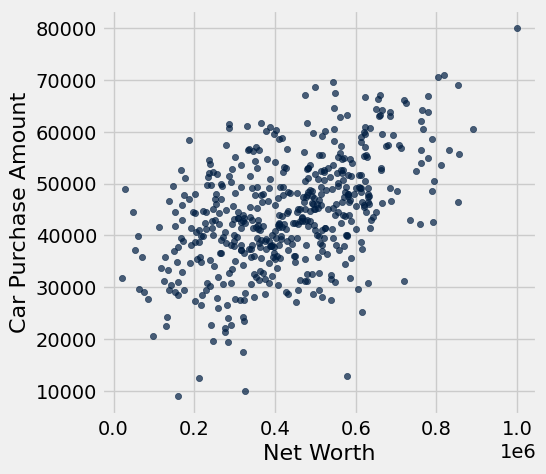

In [74]:
cars.scatter("Net Worth", "Car Purchase Amount")

<!-- END QUESTION -->

**Question 2.3**

So now we know there is a correlation. We can see it if we look at the graph as well. Now let's try to do a linear regression. Please assign the slope to `cars_slope` and the intercept to `cars_intercept`.

<!--
BEGIN QUESTION
name: q2_3
points: 8
manual: false
-->

In [76]:
def slope(tbl, x_column_name, y_column_name):
    """ Computes the slope of the regression line """
    r = correlation(tbl.column(x_column_name),tbl.column(y_column_name)) 
    y_sd = np.std(tbl.column(y_column_name)) 
    x_sd = np.std(tbl.column(x_column_name)) 
    return r * y_sd / x_sd

def intercept(tbl, x_column_name, y_column_name):
    """ Computes the intercept of the regression line """
    mean_x = np.mean(tbl.column(x_column_name)) 
    mean_y = np.mean(tbl.column(y_column_name))
    return mean_y - (slope(tbl, x_column_name, y_column_name)) * mean_x

cars_slope = slope(cars,'Net Worth','Car Purchase Amount')
cars_intercept = intercept(cars,'Net Worth','Car Purchase Amount')
cars_slope,cars_intercept

(0.030348695210388327, 31113.144609682648)

In [77]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4**

Let's make some predictions. Using the slope and intercept we calculated above, let's make some preditions. Please assign your predictions to a variable called `predictions`.

<!--
BEGIN QUESTION
name: q2_4
points: 8
manual: false
-->

In [78]:
def fitted_values(tbl, x_column_name, y_column_name):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(tbl, x_column_name, y_column_name) 
    b = intercept(tbl, x_column_name, x_column_name) 
    return a * tbl.column(x_column_name) + b

predictions = fitted_values(cars, 'Net Worth', 'Car Purchase Amount')

In [79]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5**

Now we check our accuracy. Let's plot the residuals. Note, *just* the residuals. You can reuse the `predictions` from above or recalculate them.

<!--
BEGIN QUESTION
name: q2_5
points: 8
manual: true
-->

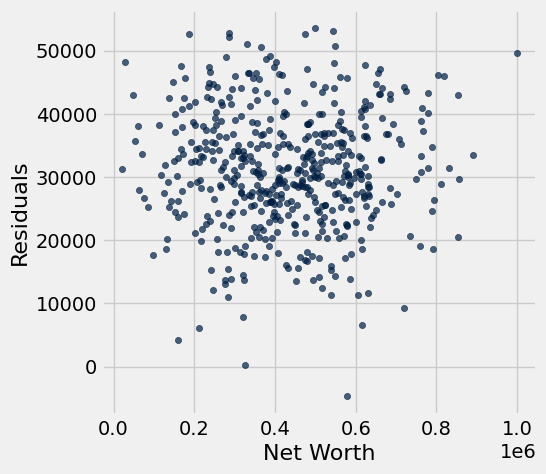

In [80]:
def residuals(t, x, y):
    predictions = fitted_values(cars, 'Net Worth', 'Car Purchase Amount')
    return t.column(y) - predictions

cars_with_residuals = cars.with_column('Residuals',residuals(cars, 'Net Worth', 'Car Purchase Amount'))
cars_with_residuals
cars_with_residuals.scatter("Net Worth", "Residuals")

<!-- END QUESTION -->

**Question 2.6**

To further check the quality of our line, let's figure out the RMSE. Do not round your result.

<!--
BEGIN QUESTION
name: q2_6
points: 8
manual: false
-->

In [81]:
fitted = slope(cars_with_residuals, "Net Worth", "Residuals") * cars_with_residuals.column('Net Worth') + intercept(cars_with_residuals, "Net Worth", "Residuals")
mse = np.mean((cars_with_residuals.column('Residuals')- fitted) ** 2)
rmse = mse**.5
rmse

9381.12339388856

In [82]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Congratulations, you are done with the Final Exam!

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu or **Download** as **ipynb**. 
3. Then submit the file to Final Exam in Gradescope. 

**It is your responsibility to make sure your work is saved before downloading.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [83]:
grader.check_all()

q0 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_6 results: All test cases passed!